create two routines that create different types of grids

a) vertical vs horizontal grids
b) checker versus stripe
c) irregular vs regular

need general routine for generating grid. 
Perhaps it is a point, followed by a translation vector
simplest possible way of expressing grids?
Grammar.

Produce labels, then training and test sets

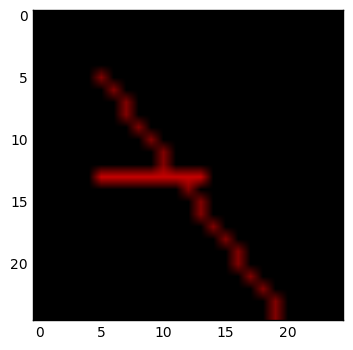

In [9]:
%matplotlib inline
import PIL
import matplotlib.pyplot as plt
from PIL import ImageDraw
a=PIL.Image.new("RGB",  (25, 25), color=0)
draw = ImageDraw.Draw(a) 
draw.line((5,5, 20,25), fill=128)
draw.line((5, 13, 13,13), fill=198)
plt.imshow(a)

In [2]:
def get_colors4():
    tp=[]
    
    num1 = random()
    num2 = (num1 + .5) % 1
    num3 = (num1 + .7) % 1
    print("num1", num1, "num2", num2, "num3", num3)
    tp.append(colorsys.hsv_to_rgb(num1, random(), .5 + random()/3 -.151))
    tp.append(colorsys.hsv_to_rgb(num2, 1 - random()/3, .5 + random()/3 -.151))
    tp.append(colorsys.hsv_to_rgb(num3, 1 - random()/3, .5 + random()/3 -.151))
    s1 = random()
    s2 = (num1 + 1/3) % 1
    s3 = (num1 + 2/3) % 1
    tp.append(colorsys.hsv_to_rgb(num1, s1, .5 + random()/3 -.151))
    tp.append(colorsys.hsv_to_rgb(num2, s2, .5 + random()/3 -.151))
    tp.append(colorsys.hsv_to_rgb(num3, s3, .5 + random()/3 -.151))
    v1 = random()
    v2 = (num1 + 1/3) % 1
    v3 = (num1 + 2/3) % 1
    tp.append(colorsys.hsv_to_rgb(num1, random(), v1))
    tp.append(colorsys.hsv_to_rgb(num2, 1 - random()/3, v2))
    tp.append(colorsys.hsv_to_rgb(num3, 1 - random()/3, v3))
    return tp

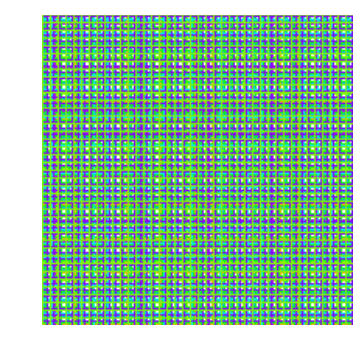

In [1]:
%matplotlib inline
import numpy as np
import math
import os
from math import pi
from random import randint
import json
import PIL
import time
import matplotlib.pyplot as plt
from PIL import ImageDraw
def make_lines(n, offset=0, size=25):
    x = list(range(-2*size+offset, 2*size+offset, n))
    pts = []
    for i in x:
        pts.append((i, -2*size))
        pts.append((i, 2 * size)) 
    return (pts)
def perpendicular( a ) :
    b = np.empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

def normalize(a):
    a = np.array(a)
    return a/np.linalg.norm(a)

def get_rotation_matrix(angle) :
     return np.matrix( ((math.cos(angle),-math.sin(angle)), (math.sin(angle), math.cos(angle))) )

    
def make_grid(interval, rot, offset=0, size=25):    
    x = make_lines(interval, offset, size)
    rmax = get_rotation_matrix(rot)
    tx=(x * rmax)
    n=2
    tx2=[tx[i:i + n] for i in range(0, len(tx), n)]
    return(tx2)

def draw_grid(draw, tx2, col): 
    for i in tx2:
        c=np.array(i).flatten()
        #print ("4 coords", list(c))
        draw.line(list(c), fill=col)
    
def init_drawing(x, y):  
    a=PIL.Image.new("RGB",  (x, y), color=(255, 255, 255)) 
    draw = ImageDraw.Draw(a) 
    return (a,draw)

def make_square_grid(h, v, angle, diff, offset=0, size=25):
    g1 = make_grid(h, angle, offset, size)
    g2 = make_grid(v, angle+diff, offset, size)
    return(g1+ g2)

def sq(darray, dsize=25, name="test.png"):
    a,draw=init_drawing(dsize, dsize)
    for d1 in darray:
        g=make_square_grid (d1['interval'], d1['interval'], d1['rot'], pi/2, offset=d1['offset'], size=dsize)
        draw_grid (draw, g, d1['col'])
    plt.imshow(a)
    plt.axis('off')
    write_png_graphics(darray)
    #use time
def sq3(d1, d2, d3):
    a,draw=init_drawing()
    g=make_square_grid (4, 4, 0, pi/2)
    g2=make_square_grid (4, 4, 0, pi/2, offset=2)
    g3=make_square_grid (6, 6, 0, pi/2, offset=0)
    draw_grid (draw, g2, "hsl(0,90%,50%)")
    draw_grid (draw, g3, "hsl(120,90%,50%)")
    draw_grid (draw, g, "hsl(240,90%,50%)")
    plt.imshow(a)
def sq2():
    dsize=50
    a,draw=init_drawing(dsize, dsize)
    g1=make_grid (4, pi/4)
    draw_grid (draw, g1, "hsl(0,90%,50%)")
    g2=make_grid (4, pi*3/4)
    draw_grid (draw, g2, "hsl(0,90%,50%)")
    g3=make_grid (6, pi*3/4)
    draw_grid (draw, g3, "hsl(0,90%,50%)")
    plt.imshow(a)
def write_png_graphics(paramstring):
    #axis('scaled')
    timestamp = time.strftime('%Y_%m_%d_%H_%M_%S')
    plt.axis('off')
    plt.savefig( "grid_image_" + timestamp + ".jpg", format='png',bbox_inches='tight') 
    json.dump(paramstring, open("grid_image_" + timestamp +".txt",'w'))
    
def finishgraphics(paramstring):
    axis('off')
    axis('scaled')
    timestamp = time.strftime('%Y_%m_%d_%H_%M_%S')
    matplotlib.pyplot.savefig( "imageTestLys_" + timestamp + paramstring + ".pdf", format='pdf', bbox_inches='tight'  ) 

       
d1={'interval':4, 'rot':0, 'offset':0, 'col':"hsl(0,90%,50%)"}
d2={'interval':4, 'rot':0, 'offset':2, 'col':"hsl(120,90%,50%)"}
d3={'interval':6, 'rot':0, 'offset':0, 'col':"hsl(240,90%,50%)"}

darray = [d1, d2, d3]
#sq(darray, 200)

def randpat(num):
    darray=[]
    name = randint(1000, 5000)
    namestring = "gridimage" + str(name)+".png"
    for i in range(num):
        d1={'interval':randint(4, 15), 'rot':0, 'offset':randint(0, 5), 'col':"hsl(" + str(randint(0,360)) + ",90%,50%)"}
        darray.append(d1)
    sq(darray, 200, namestring)

os.chdir('/Users/jeff/Dropbox/python')
randpat(9)  

NameError: name 'rand' is not defined

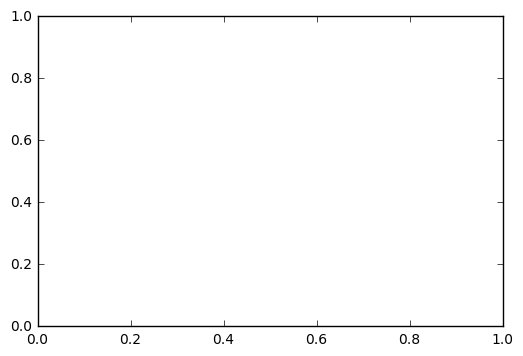

In [4]:
%matplotlib inline
import numpy as np
import math
import os
from math import pi
from random import randint
import json
import PIL
import time
import matplotlib.pyplot as plt
from PIL import ImageDraw
from matplotlib.lines import *
from matplotlib.colors import hsv_to_rgb

# do this but for pdf

def make_lines(n, offset=0, size=25):
    x = list(range(-2*size+offset, 2*size+offset, n))
    pts = []
    for i in x:
        pts.append((i, -2*size))
        pts.append((i, 2 * size)) 
    return (pts)
def perpendicular( a ) :
    b = np.empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

def normalize(a):
    a = np.array(a)
    return a/np.linalg.norm(a)

def get_rotation_matrix(angle) :
     return np.matrix( ((math.cos(angle),-math.sin(angle)), (math.sin(angle), math.cos(angle))) )

    
def make_grid(interval, rot, offset=0, size=25):    
    x = make_lines(interval, offset, size)
    rmax = get_rotation_matrix(rot)
    tx=(x * rmax)
    n=2
    tx2=[tx[i:i + n] for i in range(0, len(tx), n)]
    return(tx2)

def drawline(pointlist,  colorvalue, linewidth=1):
    #print("pointlist", pointlist)
    line1_xs = [pointlist[0], pointlist[2]]
    line1_ys = [pointlist[1], pointlist[3]]
    #(line1_xs, line1_ys) = zip(*pointlist)
    ax.add_line(Line2D(line1_xs, line1_ys, linewidth, color=hsv_to_rgb(colorvalue)))



def draw_grid(draw, tx2, colorvalue, linewidth=1): 
    for i in tx2:
     
        c=np.array(i).flatten()
        #print ("4 coords", list(c))
        drawline(list(c), colorvalue, linewidth)
    
def init_drawing_pdf(x, y):  
    fig.set_size_inches(x,y) 

def make_square_grid(h, v, angle, diff, offset=0, size=25):
    g1 = make_grid(h, angle, offset, size)
    g2 = make_grid(v, angle+diff, offset, size)
    return(g1+ g2)

def sq(darray, dsize=6):
    init_drawing_pdf(dsize, dsize)
    for d1 in darray:
        g=make_square_grid (d1['interval'], d1['interval'], d1['rot'], pi/2, offset=d1['offset'], size=100)
        draw_grid (draw, g, d1['col'], linewidth=d1['linewidth'])
    plt.axis('off')
    ax.plot()
    show()
    plt.axis('off')
    write_pdf_graphics(darray)
    #use time

def write_png_graphics(paramstring):
    #axis('scaled')
    timestamp = time.strftime('%Y_%m_%d_%H_%M_%S')
    plt.axis('off')
    plt.savefig( "grid_image_" + timestamp + ".png", format='png',bbox_inches='tight') 
    json.dump(paramstring, open("grid_image_" + timestamp +".txt",'w'))
    
def write_pdf_graphics(paramstring):
    axis('off')

    timestamp = time.strftime('%Y_%m_%d_%H_%M_%S')
    fig.savefig( "grid_pdf_" + timestamp + ".pdf", format='pdf', bbox_inches='tight'  ) 
    json.dump(paramstring, open("grid_pdf_" + timestamp +".txt",'w'))


def randpatold(num):
    darray=[]

    for i in range(3):
        colorvalue = (random(),.5,.5)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(3, 20)}
        darray.append(d1)
    for i in range(num):
        colorvalue = (random(),.5,.9)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.2, 1.5)}
        darray.append(d1)
    for i in range(4):   
        colorvalue = (random(),.8,uniform(.3, .6))
        d1={'interval':randint(2, 30), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.05, .2)}
        darray.append(d1)
    sq(darray, 6)

def randpat(num):
    darray=[]

    for i in range(2):
        colorvalue = (random(),.5,.5)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(3, 15)}
        darray.append(d1)
    for i in range(num):
        colorvalue = (random(),.5,.9)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot': choice([0, pi/4, pi/2, pi/8]), 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.2, 1.5)}
        darray.append(d1)
    for i in range(4):   
        colorvalue = (random(),.8,uniform(.3, .6))
        d1={'interval':randint(2, 30), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.05, .2)}
        darray.append(d1)
    sq(darray, 6)      

   
os.chdir('/Users/jeff/Dropbox/python')
fig, ax = plt.subplots()

randpat(8)  

NameError: name 'rand' is not defined

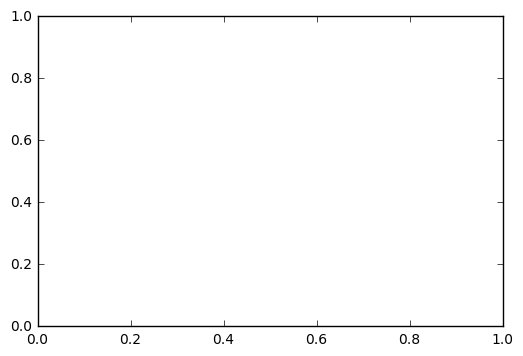

In [2]:
%matplotlib inline
import numpy as np
import math
import os
from math import pi
from random import randint
import json
import PIL
import time
import matplotlib.pyplot as plt
from PIL import ImageDraw
from matplotlib.lines import *
from matplotlib.colors import hsv_to_rgb

# do this but for pdf

def make_lines(n, offset=0, size=25):
    x = list(range(-2*size+offset, 2*size+offset, n))
    pts = []
    for i in x:
        pts.append((i, -2*size))
        pts.append((i, 2 * size)) 
    return (pts)
def perpendicular( a ) :
    b = np.empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

def normalize(a):
    a = np.array(a)
    return a/np.linalg.norm(a)

def get_rotation_matrix(angle) :
     return np.matrix( ((math.cos(angle),-math.sin(angle)), (math.sin(angle), math.cos(angle))) )

    
def make_grid(interval, rot, offset=0, size=25):    
    x = make_lines(interval, offset, size)
    rmax = get_rotation_matrix(rot)
    tx=(x * rmax)
    n=2
    tx2=[tx[i:i + n] for i in range(0, len(tx), n)]
    return(tx2)

def drawline(pointlist,  colorvalue, linewidth=1):
    #print("pointlist", pointlist)
    line1_xs = [pointlist[0], pointlist[2]]
    line1_ys = [pointlist[1], pointlist[3]]
    #(line1_xs, line1_ys) = zip(*pointlist)
    ax.add_line(Line2D(line1_xs, line1_ys, linewidth, color=hsv_to_rgb(colorvalue)))



def draw_grid(draw, tx2, colorvalue, linewidth=1): 
    for i in tx2:
     
        c=np.array(i).flatten()
        #print ("4 coords", list(c))
        drawline(list(c), colorvalue, linewidth)
    
def init_drawing_pdf(x, y):  
    fig.set_size_inches(x,y) 

def make_square_grid(h, v, angle, diff, offset=0, size=25):
    g1 = make_grid(h, angle, offset, size)
    g2 = make_grid(v, angle+diff, offset, size)
    return(g1+ g2)

def sq(darray, dsize=6):
    init_drawing_pdf(dsize, dsize)
    for d1 in darray:
        g=make_square_grid (d1['interval'], d1['interval'], d1['rot'], pi/2, offset=d1['offset'], size=100)
        draw_grid (draw, g, d1['col'], linewidth=d1['linewidth'])
    plt.axis('off')
    ax.plot()
    show()
    plt.axis('off')
    write_pdf_graphics(darray)
    #use time

def write_png_graphics(paramstring):
    #axis('scaled')
    timestamp = time.strftime('%Y_%m_%d_%H_%M_%S')
    plt.axis('off')
    plt.savefig( "grid_image_" + timestamp + ".png", format='png',bbox_inches='tight') 
    json.dump(paramstring, open("grid_image_" + timestamp +".txt",'w'))
    
def write_pdf_graphics(paramstring):
    axis('off')

    timestamp = time.strftime('%Y_%m_%d_%H_%M_%S')
    fig.savefig( "grid_pdf_" + timestamp + ".pdf", format='pdf', bbox_inches='tight'  ) 
    json.dump(paramstring, open("grid_pdf_" + timestamp +".txt",'w'))


def randpatold(num):
    darray=[]

    for i in range(3):
        colorvalue = (random(),.5,.5)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(3, 20)}
        darray.append(d1)
    for i in range(num):
        colorvalue = (random(),.5,.9)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.2, 1.5)}
        darray.append(d1)
    for i in range(4):   
        colorvalue = (random(),.8,uniform(.3, .6))
        d1={'interval':randint(2, 30), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.05, .2)}
        darray.append(d1)
    sq(darray, 6)

def randpat(num):
    darray=[]

    for i in range(2):
        colorvalue = (random(),.5,.5)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(3, 15)}
        darray.append(d1)
    for i in range(num):
        colorvalue = (random(),.5,.9)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot': choice([0, pi/4, pi/2]), 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.2, 1.5)}
        darray.append(d1)
    for i in range(4):   
        colorvalue = (random(),.8,uniform(.3, .6))
        d1={'interval':randint(2, 30), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.05, .2)}
        darray.append(d1)
    sq(darray, 6)      

   
os.chdir('/Users/jeff/Dropbox/python')
fig, ax = plt.subplots()

randpat(16)  

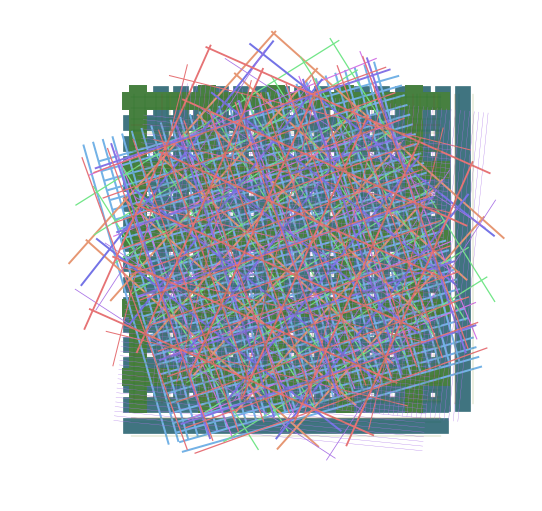

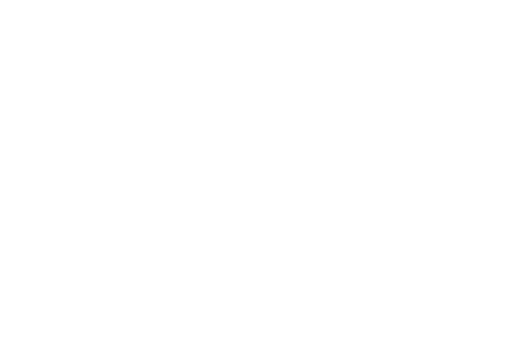

In [11]:
%matplotlib inline
import numpy as np
import math
import os
from math import pi
from random import randint
import json
import PIL
import time
import matplotlib.pyplot as plt
from PIL import ImageDraw
from matplotlib.lines import *
from matplotlib.colors import hsv_to_rgb

# do this but for pdf

def make_lines(n, offset=0, size=25):
    x = list(range(-2*size+offset, 2*size+offset, n))
    pts = []
    for i in x:
        pts.append((i, -2*size))
        pts.append((i, 2 * size)) 
    return (pts)
def perpendicular( a ) :
    b = np.empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

def normalize(a):
    a = np.array(a)
    return a/np.linalg.norm(a)

def get_rotation_matrix(angle) :
     return np.matrix( ((math.cos(angle),-math.sin(angle)), (math.sin(angle), math.cos(angle))) )

    
def make_grid(interval, rot, offset=0, size=25):    
    x = make_lines(interval, offset, size)
    rmax = get_rotation_matrix(rot)
    tx=(x * rmax)
    n=2
    tx2=[tx[i:i + n] for i in range(0, len(tx), n)]
    return(tx2)

def drawline(pointlist,  colorvalue, linewidth=1):
    #print("pointlist", pointlist)
    line1_xs = [pointlist[0], pointlist[2]]
    line1_ys = [pointlist[1], pointlist[3]]
    #(line1_xs, line1_ys) = zip(*pointlist)
    ax.add_line(Line2D(line1_xs, line1_ys, linewidth, color=hsv_to_rgb(colorvalue)))



def draw_grid(draw, tx2, colorvalue, linewidth=1): 
    for i in tx2:
     
        c=np.array(i).flatten()
        #print ("4 coords", list(c))
        drawline(list(c), colorvalue, linewidth)
    
def init_drawing_pdf(x, y):  
    fig.set_size_inches(x,y) 

def make_square_grid(h, v, angle, diff, offset=0, size=25):
    g1 = make_grid(h, angle, offset, size)
    g2 = make_grid(v, angle+diff, offset, size)
    return(g1+ g2)

def sq(darray, dsize=6):
    init_drawing_pdf(dsize, dsize)
    for d1 in darray:
        g=make_square_grid (d1['interval'], d1['interval'], d1['rot'], pi/2, offset=d1['offset'], size=100)
        draw_grid (draw, g, d1['col'], linewidth=d1['linewidth'])
    plt.axis('off')
    ax.plot()
    show()
    plt.axis('off')
    write_pdf_graphics(darray)
    #use time

def write_png_graphics(paramstring):
    #axis('scaled')
    timestamp = time.strftime('%Y_%m_%d_%H_%M_%S')
    plt.axis('off')
    plt.savefig( "grid_image_" + timestamp + ".png", format='png',bbox_inches='tight') 
    json.dump(paramstring, open("grid_image_" + timestamp +".txt",'w'))
    
def write_pdf_graphics(paramstring):
    axis('off')

    timestamp = time.strftime('%Y_%m_%d_%H_%M_%S')
    fig.savefig( "grid_pdf_" + timestamp + ".pdf", format='pdf', bbox_inches='tight'  ) 
    json.dump(paramstring, open("grid_pdf_" + timestamp +".txt",'w'))


def randpatold(num):
    darray=[]

    for i in range(3):
        colorvalue = (random(),.5,.5)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(3, 20)}
        darray.append(d1)
    for i in range(num):
        colorvalue = (random(),.5,.9)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.2, 1.5)}
        darray.append(d1)
    for i in range(4):   
        colorvalue = (random(),.8,uniform(.3, .6))
        d1={'interval':randint(2, 30), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.05, .2)}
        darray.append(d1)
    sq(darray, 6)

def randpat(num):
    darray=[]

    for i in range(2):
        colorvalue = (random(),.5,.5)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(3, 15)}
        darray.append(d1)
    for i in range(num):
        colorvalue = (random(),.5,.9)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot': uniform(0, pi/2), 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.2, 1.5)}
        darray.append(d1)
    for i in range(4):   
        colorvalue = (random(),.8,uniform(.3, .6))
        d1={'interval':randint(2, 30), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.05, .2)}
        darray.append(d1)
    sq(darray, 6)      

   
os.chdir('/Users/jeff/Dropbox/python')
fig, ax = plt.subplots()

randpat(11)  

In [7]:
import pandas
import tensorflow as tf
class DataSet(object):

  def __init__(self, images, labels, fake_data=False, one_hot=False,
               dtype=tf.float32):
    """Construct a DataSet.

    one_hot arg is used only if fake_data is true.  `dtype` can be either
    `uint8` to leave the input as `[0, 255]`, or `float32` to rescale into
    `[0, 1]`.
    """
    dtype = tf.as_dtype(dtype).base_dtype
    if dtype not in (tf.uint8, tf.float32):
      raise TypeError('Invalid image dtype %r, expected uint8 or float32' %
                      dtype)
    if fake_data:
      self._num_examples = 10000
      self.one_hot = one_hot
    else:
      assert images.shape[0] == labels.shape[0], (
          'images.shape: %s labels.shape: %s' % (images.shape,
                                                 labels.shape))
      self._num_examples = images.shape[0]

      # Convert shape from [num examples, rows, columns, depth]
      # to [num examples, rows*columns] (assuming depth == 1)
      assert images.shape[3] == 1
      images = images.reshape(images.shape[0],
                              images.shape[1] * images.shape[2])
      if dtype == tf.float32:
        # Convert from [0, 255] -> [0.0, 1.0].
        images = images.astype(numpy.float32)
        images = numpy.multiply(images, 1.0 / 255.0)
    self._images = images
    self._labels = labels
    self._epochs_completed = 0
    self._index_in_epoch = 0

  @property
  def images(self):
    return self._images

  @property
  def labels(self):
    return self._labels

  @property
  def num_examples(self):
    return self._num_examples

  @property
  def epochs_completed(self):
    return self._epochs_completed

  def next_batch(self, batch_size, fake_data=False):
    """Return the next `batch_size` examples from this data set."""
    if fake_data:
      fake_image = [1] * 784
      if self.one_hot:
        fake_label = [1] + [0] * 9
      else:
        fake_label = 0
      return [fake_image for _ in xrange(batch_size)], [
          fake_label for _ in xrange(batch_size)]
    start = self._index_in_epoch
    self._index_in_epoch += batch_size
    if self._index_in_epoch > self._num_examples:
      # Finished epoch
      self._epochs_completed += 1
      # Shuffle the data
      perm = numpy.arange(self._num_examples)
      numpy.random.shuffle(perm)
      self._images = self._images[perm]
      self._labels = self._labels[perm]
      # Start next epoch
      start = 0
      self._index_in_epoch = batch_size
      assert batch_size <= self._num_examples
    end = self._index_in_epoch
    return self._images[start:end], self._labels[start:end]

In [4]:
%matplotlib inline

# this routine encompasses all the others
import pandas
import numpy as np
import math
import os
from math import pi
from random import randint
import json
import PIL
import time
import matplotlib.pyplot as plt
from PIL import ImageDraw
from matplotlib.lines import *
from matplotlib.colors import hsv_to_rgb
from random import seed
from random import *
from matplotlib.pyplot import *
import pandas as pd
import tensorflow as tf


# some ideas from book_batch.ipynb: Abrahams et al, Tensforflow for Machine Intelligence.


def make_lines(n, offset=0, size=25):
    x = list(range(-2*size+offset, 2*size+offset, n))
    pts = []
    for i in x:
        pts.append((i, -2*size))
        pts.append((i, 2 * size)) 
    return (pts)
def perpendicular( a ) :
    b = np.empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

def normalize(a):
    a = np.array(a)
    return a/np.linalg.norm(a)

def get_rotation_matrix(angle) :
     return np.matrix( ((math.cos(angle),-math.sin(angle)), (math.sin(angle), math.cos(angle))) )

    
def make_grid(interval, rot, offset=0, size=25):    
    x = make_lines(interval, offset, size)
    rmax = get_rotation_matrix(rot)
    tx=(x * rmax)
    n=2
    tx2=[tx[i:i + n] for i in range(0, len(tx), n)]
    return(tx2)

def drawline(pointlist,  colorvalue, linewidth=1):
    #print("pointlist", pointlist)
    line1_xs = [pointlist[0], pointlist[2]]
    line1_ys = [pointlist[1], pointlist[3]]
    #(line1_xs, line1_ys) = zip(*pointlist)
    ax.add_line(Line2D(line1_xs, line1_ys, linewidth, color=hsv_to_rgb(colorvalue)))



def draw_grid(draw, tx2, colorvalue, linewidth=1, pdf=1): 
    for i in tx2:
     
        c=np.array(i).flatten()
        #print ("4 coords", list(c))
        if pdf ==1:
            drawline(list(c), colorvalue, linewidth)
        else:
            draw.line(list(c), colorvalue)
def init_drawing_pdf(x, y):  
    fig.set_size_inches(x,y) 

def make_square_grid(h, v, angle, diff, offset=0, size=25):
    g1 = make_grid(h, angle, offset, size)
    g2 = make_grid(v, angle+diff, offset, size)
    return(g1+ g2)
def make_tri_grid(h, v, angle, diff, offset=0, size=25):
    g1 = make_grid(h, angle, offset, size)
    g2 = make_grid(v, angle+diff, offset, size)
    g3 = make_grid(v, angle+2*diff, offset, size)
    return(g1+ g2+g3)
def sq(darray, dsize=6, pdf=1):
    if pdf ==1:
        init_drawing_pdf(dsize, dsize)
    else:
        a,draw=init_drawing(dsize, dsize)
    for d1 in darray:
        g=make_square_grid (d1['interval'], d1['interval'], d1['rot'], d1['secondrot'], offset=d1['offset'], size=200)
        draw_grid (draw, g, d1['col'], linewidth=d1['linewidth'], pdf=pdf)
    plt.axis('off')
    ax.plot()
    show()
    plt.axis('off')
    if pdf == 1:
        write_pdf_graphics(darray)
    else:
        plt.imshow(a)
        plt.axis('off')
        #write_png_graphics(darray)
        write_jpg_graphics(darray)
    #use time
def sqtri(darray, dsize=6, pdf=1):
    init_drawing_pdf(dsize, dsize)
    for d1 in darray:
        g=make_tri_grid (d1['interval'], d1['interval'], d1['rot'], d1['secondrot'], offset=d1['offset'], size=100)
        draw_grid (draw, g, d1['col'], linewidth=d1['linewidth'], pdf=pdf)
    plt.axis('off')
    ax.plot()
    show()
    plt.axis('off')
    if pdf == 1:
        write_pdf_graphics(darray)
    else:
        write_png_graphics(darray)
    #use time
def write_png_graphics(paramstring):
    #axis('scaled')
    global count
    tstamp = time.strftime('%Y_%m_%d_%H_%M_%S')
    count = count+1
    countstring = str(count).zfill(2)
    timestamp = tstamp + "_" + countstring
    filename="grid_image_" + timestamp  + ".png" 
    file_list.append(filename)
    label_list.append(paramstring[0]['condition'])
    plt.axis('off')
    plt.savefig(filename, format='png',bbox_inches='tight') 
    json.dump(paramstring, open("grid_image_" + timestamp +".txt",'w'))
    
def write_jpg_graphics(paramstring):
    #axis('scaled')
    global count
    tstamp = time.strftime('%Y_%m_%d_%H_%M_%S')
    count = count+1
    countstring = str(count).zfill(2)
    timestamp = tstamp + "_" + countstring
    filename="grid_image_" + timestamp  + ".png" 
    file_list.append(filename)
    label_list.append(paramstring[0]['condition'])
    plt.axis('off')
    plt.savefig(filename, format='jpg',bbox_inches='tight') 
    json.dump(paramstring, open("grid_image_" + timestamp +".txt",'w'))    
    
def write_pdf_graphics(paramstring):
    axis('off')

    timestamp = time.strftime('%Y_%m_%d_%H_%M_%S')
    fig.savefig( "grid_pdf_" + timestamp + ".pdf", format='pdf', bbox_inches='tight'  ) 
    json.dump(paramstring, open("grid_pdf_" + timestamp +".txt",'w'))


def randpatold(num):
    darray=[]

    for i in range(3):
        colorvalue = (random(),.5,.5)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(3, 20)}
        darray.append(d1)
    for i in range(num):
        colorvalue = (random(),.5,.9)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.2, 1.5)}
        darray.append(d1)
    for i in range(4):   
        colorvalue = (random(),.8,uniform(.3, .6))
        d1={'interval':randint(2, 30), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.05, .2)}
        darray.append(d1)
    sq(darray, 6)

def randpat(num):
    darray=[]

    for i in range(1):
        colorvalue = (random(),.5,.5)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(3, 15)}
        darray.append(d1)
    for i in range(4):
        colorvalue = (random(),.5,.9)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot': uniform(0, pi/2), 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.2, 1.5)}
        darray.append(d1)
    for i in range(num):
        colorvalue = (random(),.5,.9)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot': choice([0, pi/4, pi/2]), 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.2, 1.5)}
        darray.append(d1)
    for i in range(4):   
        colorvalue = (random(),.8,uniform(.3, .6))
        d1={'interval':randint(2, 30), 'rot':0, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.05, .2)}
        darray.append(d1)
    sq(darray, 6)      
def randpat60(num):
    darray=[]

    for i in range(10):   
        colorvalue = (random(),.8,uniform(.3, .9))
        d1={'interval':randint(5, 9), 'rot':uniform(0, pi), 'secondrot': pi/3, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.0005, .001)}
        darray.append(d1)
    for i in range(2):   
        colorvalue = (random(),.8,uniform(.3, .9))
        d1={'interval':randint(5, 9), 'rot':uniform(0, pi), 'secondrot': pi/3, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.001, .1)}
        darray.append(d1)
    for i in range(1):   
        colorvalue = (random(),.8,uniform(.3, .9))
        d1={'interval':randint(5, 9), 'rot':uniform(0, pi), 'secondrot': pi/3, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(1, .2)}
        darray.append(d1)
    for i in range(num):
        colorvalue = (0 + random()/10,.9,.9)
        #print ("colorvalue", colorvalue)
        trirot = 2*pi/3
        d1={'interval':randint(4, 100), 'rot':uniform(0, pi), 'secondrot': 2*pi/9, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.2, 1.5)}
        darray.append(d1)
  
    for i in range(0):
        colorvalue = (random(),.5,.5)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot':uniform(0, pi), 'secondrot': pi/3, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(3, 4)}
        darray.append(d1)
    for i in range(0):
        colorvalue = (0,.5,.5)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot':uniform(0, pi), 'secondrot': pi/3, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(5, 6)}
        darray.append(d1)
    sqtri(darray, 6)  
def randpat60layer(num):
    darray=[]

    for i in range(1):   
        colorvalue = (random(),.8,uniform(.3, .9))
        d1={'interval':randint(5, 9), 'rot':uniform(0, pi), 'secondrot': pi/3, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.0005, .001)}
        cla()
        #fig, ax = plt.subplots()
        sqtri([d1], 6) 
        darray.append(d1)
    for i in range(2):   
        colorvalue = (random(),.8,uniform(.3, .9))
        d1={'interval':randint(5, 9), 'rot':uniform(0, pi), 'secondrot': pi/3, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.001, .1)}
        cla()
        #fig, ax = plt.subplots()
        sqtri([d1], 6) 
        darray.append(d1)
    for i in range(1):   
        colorvalue = (random(),.8,uniform(.3, .9))
        d1={'interval':randint(5, 9), 'rot':uniform(0, pi), 'secondrot': pi/3, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(1, .2)}
        cla()
        #fig, ax = plt.subplots()
        sqtri([d1], 6) 
        darray.append(d1)
    for i in range(num):
        colorvalue = (0 + random()/10,.9,.9)
        #print ("colorvalue", colorvalue)
        trirot = 2*pi/3
        d1={'interval':randint(4, 100), 'rot':uniform(0, pi), 'secondrot': 2*pi/9, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(.2, 1.5)}
        cla()
        #fig, ax = plt.subplots()
        sqtri([d1], 6) 
        darray.append(d1)
  
    for i in range(0):
        colorvalue = (random(),.5,.5)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(4, 100), 'rot':uniform(0, pi), 'secondrot': pi/3, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(3, 4)}
        darray.append(d1)
    for i in range(0):
        colorvalue = (0,.5,.5)
        #print ("colorvalue", colorvalue)
        d1={'interval':randint(1, 4), 'rot':uniform(0, pi), 'secondrot': pi/3, 'offset':randint(0, 50), 'col': colorvalue, 'linewidth': uniform(5, 6)}
        darray.append(d1)
    #sqtri(darray, 6)  
    
def large_pdf_plot(s):
    fig, ax = plt.subplots()
    seed(s)
    randpat60(4)  
def large_pdf_plot_layer(s):
    fig, ax = plt.subplots()
    seed(s)
    randpat60layer(4)
def make_image_90(p_interval, p_offset, p_color):
    darray=[]
    #colorvalue = "hsl(0,90%,50%)"
    d1={'interval':p_interval, 'rot':0, 'secondrot': pi/2, 'offset':p_offset, 'col': p_color, 'linewidth': 1, 'condition':90}
    darray.append(d1)
    sq(darray, 25, pdf=0)
def make_image_45(p_interval, p_offset, p_color):
    darray=[]
    #colorvalue = "hsl(0,90%,50%)"
    d1={'interval':p_interval, 'rot':pi/4, 'secondrot': pi/2, 'offset':p_offset, 'col': p_color, 'linewidth': 1, 'condition':45}
    darray.append(d1)
    sq(darray, 25, pdf=0)
    

def read_filenames_labels(filename):
    try:
        frame = pandas.read_csv(filename)
    except Exception as e:
        print("exception", e)
    return(frame)


def write_data_set_file(image_list, label_list, outfile):
    
    new_data={'image': image_list, 'category':label_list}
    new_frame=pd.DataFrame(new_data)
    new_frame.to_csv(outfile, cols=['image', 'category'], header="True")

#split into train, validation, and test sets.
def split_frame_three(frame):
    mid = math.floor(frame.shape[0]*0.75)
    late = math.floor(frame.shape[0]*0.9)
    s=np.array_split(frame, [mid, late])
    return(s)
def split_frame_two(frame):
    mid = math.floor(frame.shape[0]*0.70)
   
    s=np.array_split(frame, [mid])
    return(s)
def read_data_sets_two(train_dir, csvfile, one_hot=False, dtype=tf.float32):
    class DataSets(object):
        pass
    data_sets = DataSets()

    filename=train_dir + csvfile
    f=read_filenames_labels(filename)
    print("f", f)
    np.random.seed(17)
    rf=f.reindex(np.random.permutation(f.index))
    #print (rf)
    sf=split_frame_two(rf)
    train=sf[0]
    test=sf[1]
    validation=sf[2]

    train_images=get_images(train['image'])
    print ("train images shape", train_images.shape)
    train_labels=get_labels(train['category'])
    test_images=get_images(test['image'])
    test_labels=get_labels(test['category'])
    
    return training_set, test_set                         
def read_data_sets(train_dir, csvfile, one_hot=False, dtype=tf.float32):
    class DataSets(object):
        pass
    data_sets = DataSets()

    filename=train_dir + csvfile
    f=read_filenames_labels(filename)
    print("f", f)
    np.random.seed(17)
    rf=f.reindex(np.random.permutation(f.index))
    #print (rf)
    sf=split_frame_two(rf)
    train=sf[0]
    test=sf[1]
    validation=sf[2]

    train_images=get_images(train['image'])
    print ("train images shape", train_images.shape)
    train_labels=get_labels(train['category'])
    test_images=get_images(test['image'])
    test_labels=get_labels(test['category'])
    validation_images=get_images(validation['image'])
    validation_labels=get_labels(validation['category'])

    data_sets.train = DataSet(train_images, train_labels, dtype=dtype)
    data_sets.validation = DataSet(validation_images, validation_labels,
                                         dtype=dtype)
    data_sets.test = DataSet(test_images, test_labels, dtype=dtype)
    print("done reading dataset")
    return data_sets    

file_list=[]
label_list=[]
count = 0                                          


def make_test_images():
    os.chdir('/Users/jeff/Dropbox/python/testimages')



  
    for interval in range(2, 12): 
        for offset in range (0,10):
            make_image_90(interval, offset, "hsl(0,90%,50%)")
    for interval in range(2, 12): 
        for offset in range (0,10):
            make_image_45(interval, offset, "hsl(0,90%,50%)")

    print (file_list)
    print (label_list)
    write_data_set_file(file_list, label_list, "test_data_out.csv")
 
#make_test_images()
def read_one_image():
    """read in the file of images then read in one image and get the configuration right to put through a net"""
    os.chdir('/Users/jeff/Dropbox/python/testimages')
    f=read_filenames_labels("test_data_out.csv")
    image_names = f['image']
    labels = f['category']
    test_image =image_names[0]
    print("test_image", test_image)
    image_file=tf.read_file(test_image)
    #fq=tf.train.string_input_producer(tf.train.match_filenames_once(test_image))
    #print ("fq", fq)
   # image_reader=tf.WholeFileReader()
    #print("image reader", image_reader)
    #b, image_file=image_reader.read(fq)
    #print("image file", image_file)
    try:
        image=tf.image.decode_png(image_file)
    except:
        print ("bad file", test_image)
    print("image", image)
    sess=tf.Session()

    out=sess.run(image)
    print("image2", image)
    print(out)
    sess.close()
#read_one_image()
def split_frame_two(frame):
    mid = math.floor(frame.shape[0]*0.70)
   
    s=np.array_split(frame, [mid])
    return(s)
def create_sets(file):
    try:
        f=read_filenames_labels(file)
    except IOError:
        print ("Could not read file:", file)
        exit()
    np.random.seed(17)
    rf=f.reindex(np.random.permutation(f.index))
    #print (rf)
    #sf=split_frame(rf)
 
    sf=split_frame_two(rf)
    train=sf[0]
    test=sf[1]
    train_images=train['image']
    train_labels=train['category']
    test_images=test['image']
    test_labels=test['category']
    return train, test
def write_records_file(dataframe, record_location):
    """
    Fill a TFRecords file with the images found in `dataset` and include their category.

    Parameters
    ----------
    dataset : dict(list)
      Dictionary with each key being a label for the list of image filenames of its value.
    record_location : str
      Location to store the TFRecord output.
    """
    writer = None

    # Enumerating the dataset because the current index is used to breakup the files if they get over 100
    # images to avoid a slowdown in writing.
    current_index = 0
 
    for index, row in dataframe.iterrows():
        image_filename = row['image']
        if current_index % 100 == 0:
            if writer:
                writer.close()

            record_filename = "{record_location}-{current_index}.tfrecords".format(
                record_location=record_location,
                current_index=current_index)

            writer = tf.python_io.TFRecordWriter(record_filename)
        current_index += 1

        image_file = tf.read_file(image_filename)

        # In ImageNet dogs, there are a few images which TensorFlow doesn't recognize as JPEGs. This

        try:
            image = tf.image.decode_png(image_file, channels=1, dtype=tf.uint8)
        except:
            print("image not read")
            print(image_filename)
            continue

        # Converting to grayscale saves processing and memory but isn't required.
        #grayscale_image = tf.image.rgb_to_grayscale(image)
        #resized_image = tf.image.resize_images(grayscale_image, 250, 151)

        # tf.cast is used here because the resized images are floats but haven't been converted into
        # image floats where an RGB value is between [0,1).
        image_bytes = sess.run(tf.cast(image, tf.uint8)).tobytes()

        # Instead of using the label as a string, it'd be more efficient to turn it into either an
        # integer index or a one-hot encoded rank one tensor.
        # https://en.wikipedia.org/wiki/One-hot
        image_label = str(row['category']).encode("utf-8")

        example = tf.train.Example(features=tf.train.Features(feature={
            'label': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_label])),
            'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_bytes]))
        }))

        writer.write(example.SerializeToString())
    writer.close()




os.chdir('/Users/jeff/Dropbox/python/testimages')
train, test= create_sets("test_data_out.csv")
#print (test)
sess=tf.Session()
write_records_file(test, "./testing-image")
write_records_file(train, "./training-image")   


In [ ]:
 Below, we load the images just written above.

In [1]:
import os
import tensorflow as tf
os.chdir('/Users/jeff/Dropbox/python/testimages')

filename_queue = tf.train.string_input_producer(
    tf.train.match_filenames_once("./training*.tfrecords"))
reader = tf.TFRecordReader()
_, serialized = reader.read(filename_queue)

features = tf.parse_single_example(
    serialized,
    features={
        'label': tf.FixedLenFeature([], tf.string),
        'image': tf.FixedLenFeature([], tf.string),
    })

record_image = tf.decode_raw(features['image'], tf.uint8)

# Changing the image into this shape helps train and visualize the output by converting it to
# be organized like an image.
image = tf.reshape(record_image, [25, 25, 1])

label = tf.cast(features['label'], tf.string)

min_after_dequeue = 10
batch_size = 3
capacity = min_after_dequeue + 3 * batch_size
image_batch, label_batch = tf.train.shuffle_batch(
    [image, label], batch_size=batch_size, capacity=capacity, min_after_dequeue=min_after_dequeue)

# Converting the images to a float of [0,1) to match the expected input to convolution2d
float_image_batch = tf.image.convert_image_dtype(image_batch, tf.float32)

conv2d_layer_one = tf.contrib.layers.convolution2d(
    float_image_batch,
    num_outputs=32,     # The number of filters to generate
    kernel_size=(5,5),          # It's only the filter height and width.
    activation_fn=tf.nn.relu,
    weights_initializer=tf.contrib.layers.xavier_initializer(),
    stride=(2, 2),
    trainable=True)
pool_layer_one = tf.nn.max_pool(conv2d_layer_one,
    ksize=[1, 2, 2, 1],
    strides=[1, 2, 2, 1],
    padding='SAME')

# Note, the first and last dimension of the convolution output hasn't changed but the
# middle two dimensions have.
conv2d_layer_one.get_shape(), pool_layer_one.get_shape()

(TensorShape([Dimension(3), Dimension(13), Dimension(13), Dimension(32)]),
 TensorShape([Dimension(3), Dimension(7), Dimension(7), Dimension(32)]))

In [2]:
conv2d_layer_two = tf.contrib.layers.convolution2d(
    pool_layer_one,
    num_outputs=64,        # More output channels means an increase in the number of filters
    kernel_size=(5,5),
    activation_fn=tf.nn.relu,
    weights_initializer=tf.contrib.layers.xavier_initializer(),
    stride=(1, 1),
    trainable=True)

pool_layer_two = tf.nn.max_pool(conv2d_layer_two,
    ksize=[1, 2, 2, 1],
    strides=[1, 2, 2, 1],
    padding='SAME')

conv2d_layer_two.get_shape(), pool_layer_two.get_shape()

(TensorShape([Dimension(3), Dimension(7), Dimension(7), Dimension(64)]),
 TensorShape([Dimension(3), Dimension(4), Dimension(4), Dimension(64)]))

In [3]:
flattened_layer_two = tf.reshape(
    pool_layer_two,
    [
        batch_size,  # Each image in the image_batch
        -1           # Every other dimension of the input
    ])

flattened_layer_two.get_shape()

TensorShape([Dimension(3), Dimension(1024)])

In [4]:
# The weight_init parameter can also accept a callable, a lambda is used here  returning a truncated normal
# with a stddev specified.
hidden_layer_three = tf.contrib.layers.fully_connected(
    flattened_layer_two,
    512,
    weights_initializer=tf.contrib.layers.xavier_initializer(),
    activation_fn=tf.nn.relu
)

# Dropout some of the neurons, reducing their importance in the model
hidden_layer_three = tf.nn.dropout(hidden_layer_three, 0.1)

# The output of this are all the connections between the previous layers and the 2 different categories
# available to train on.
final_fully_connected = tf.contrib.layers.fully_connected(
    hidden_layer_three,
       2,  # Number of categories
    weights_initializer=tf.contrib.layers.xavier_initializer()
)

In [5]:
train_labels = [0,0,0]

#the above is not correct: there needs to be a way to extract the labels for each batch. There are three images per batch
# so three labels are needed. 


# setup-only-ignore
loss = tf.reduce_mean(
    tf.nn.sparse_softmax_cross_entropy_with_logits(
        final_fully_connected, train_labels))

batch = tf.Variable(0)
learning_rate = tf.train.exponential_decay(
    0.01,
    batch * 3,
    2,
    0.95,
    staircase=True)

optimizer = tf.train.AdamOptimizer(
    learning_rate, 0.9).minimize(
    loss, global_step=batch)

train_prediction = tf.nn.softmax(final_fully_connected)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
a = tf.random_normal([2,20])
sess=tf.Session()
out = sess.run(a)
x, y = out
plt.scatter(x,y)
plt.show()
sess.close()

In [ ]:
sess=tf.Session()
sess.run([train_prediction])